In [1]:
# imports for exploratory dataframe manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# imports for exploratory data analysis
from sklearn.linear_model import LinearRegression, LogisticRegression

In [2]:
import os
import cv2
from sklearn.model_selection import train_test_split

In [3]:
def get_img_paths(base_dir, ignore_filetypes=['.txt', '.cpp', '.gif']):
    """
    Inputs:
        base_dir (string/ os.path type) relative path to the directory with folders containing images
        *kwargs
        ignore_filetypes (list of strings) filetypes to exclude from output
        type_foldes (dictionary) folders that identify different filetypes and add identifiers to add to output
    Returns:
        paths (list of tuples) relative paths to files with identifiers
    """
    absent_paths = []
    present_paths = []

    for root, dirs, files in os.walk(base_dir):
        #not removing undesired files
#         # remove undesired files
#         for file in files:
#             for file_type in ignore_filetypes:
#                 if file_type == file[-4:]:
#                     files.remove(file)
                    
        if files:
        
            for file in files:
                full_path = os.path.join(root, file)
                
                if 'NO' in full_path:
                    absent_paths.append((full_path, 0))

                elif 'YES' in full_path:
                    present_paths.append((full_path, 1))

    #         if type_folders:
    #             for key, value in type_folders.items():
    #                 if key in root:

    #         print('root: ', root)
    #         print('files: ', files[:5], len(files))
    #         print('paths: ', paths)
#     absent_paths.extend(present_paths)
    return absent_paths, present_paths

In [4]:
basedir = "D:\MRI_data\Kaggle" 
absent, present = get_img_paths(basedir)

In [5]:
len(absent + present)

3530

In [6]:
len(present)

2919

In [7]:
def get_data(input_data, img_size=150):
    """
    This function takes an image type and classification with matching index and returns  image data with classification

    Input:
        x (list of path like entries) paths leading to image data to be loaded
        y (list of classification) list of classifications matching index of x data

    Returns:
        data (np.array) image data with classification
    """

    data = []

    for i in range(len(input_data)):
        path = input_data[i][0]
        class_num = input_data[i][1]

        #         for img in os.listdir(path):

        try:
            img_arr = cv2.imread(path)
            resized_arr = cv2.resize(img_arr, (img_size, img_size))  # Reshaping images to preferred size
            data.append([resized_arr, class_num, path])

        except Exception as e:
            print(f'{e} on path {path}')

    return np.array(data)

In [8]:
tumor_data = get_data(present)
len(tumor_data)

2919

In [9]:
import time

In [10]:
start = time.time()
(tumor_data[0][0] == tumor_data[0][0]).all()
(tumor_data[2][0] == tumor_data[1][0]).all()
stop = time.time()

stop-start

0.0

## Use pillow to compare images

In [11]:
# # from https://stackoverflow.com/questions/35176639/compare-images-python-pil/56280735
# # import pillow to compare images
# from PIL import Image
# from PIL import ImageChops

In [12]:
# start = time.time()

# img1 = Image.open(present[0][0])
# img2 = Image.open(present[2][0])
# # img3 = Image.open(present1)
# diff = ImageChops.difference(img1, img2)


# stop = time.time()
# stop-start

## Train Test Split Data

In [13]:
# define train size for data set
# split before combining datasets
train_size = 0.8 # eighty percent
test_size = 0.15 # fifteen percent
val_size = 0.05 # five percent

# calculate test size for second split
test_size2 = test_size/(1-train_size)

# split absent paths into train and test
absent_train, absent_test = train_test_split(absent, train_size=train_size, random_state=2021)

# split absent test paths into test and validation
absent_test, absent_val = train_test_split(absent_test, train_size=test_size2, random_state=2021)

# split present paths into train and test
present_train, present_test = train_test_split(present, train_size=train_size, random_state=2021)

# split present paths into test and val
present_test, present_val = train_test_split(present_test, train_size=test_size2, random_state=2021)

In [14]:
print(f'''
Tumor Training Data: {len(present_train)}\n
Tumor Testing Data: {len(present_test)}\n
Tumor Validation Data: {len(present_val)}\n
Absent Training Data: {len(absent_train)}\n
Absent Testing Data: {len(absent_test)}\n
Absent Validation Data: {len(absent_val)}
''')


Tumor Training Data: 2335

Tumor Testing Data: 438

Tumor Validation Data: 146

Absent Training Data: 488

Absent Testing Data: 92

Absent Validation Data: 31



In [15]:
# combnine train and test and val (respectively)
train = absent_train
train.extend(present_train)

test = absent_test
test.extend(present_test)

val = absent_val
val.extend(present_val)

# load data 

In [16]:
train_img_data = get_data(train)
train_img_len = len(train_img_data)

val_img_data = get_data(val)
val_img_len = len(val_img_data)

test_img_data = get_data(test)
test_img_len = len(test_img_data)

print(f"\nTrain images: {train_img_len}\nValidation images: {val_img_len}\nTest images: {test_img_len}")

OpenCV(4.0.1) C:\ci\opencv-suite_1573470242804\work\modules\imgproc\src\resize.cpp:3784: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'
 on path D:\MRI_data\Kaggle\classification_images\Training\NO\no_tumor\frontal_section\notebooks\T1_MRI.gif
OpenCV(4.0.1) C:\ci\opencv-suite_1573470242804\work\modules\imgproc\src\resize.cpp:3784: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'
 on path D:\MRI_data\Kaggle\classification_images\Training\NO\no_tumor\frontal_section\notebooks\T2_MRI.gif
OpenCV(4.0.1) C:\ci\opencv-suite_1573470242804\work\modules\imgproc\src\resize.cpp:3784: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'
 on path D:\MRI_data\Kaggle\classification_images\Training\NO\no_tumor\frontal_section\notebooks\.ipynb_checkpoints\T1_MRI-checkpoint.gif
OpenCV(4.0.1) C:\ci\opencv-suite_1573470242804\work\modules\imgproc\src\resize.cpp:3784: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'
 on pa

In [17]:
len(train)

2823

In [18]:
train[0]

('D:\\MRI_data\\Kaggle\\classification_images\\Testing\\NO\\no_tumor\\horizontal_section\\image(24).jpg',
 0)

In [19]:
train_img_data[0][2]

'D:\\MRI_data\\Kaggle\\classification_images\\Testing\\NO\\no_tumor\\horizontal_section\\image(24).jpg'

## Remove Duplicate Images

In [20]:
def remove_duplicates(data):
    '''
    function takes a list of entries and returns a list of all unique entries
    '''

    unique_list = []
    duplicate_list = []
    # loop through original images
    for image in data:
        img = image[0]
        
        is_unique = True
        
        # loop through new list
        for unique_image in unique_list:
            unique_img = unique_image[0]
            
            # check existing entries to new entry
            if (img == unique_img).all():
                is_unique = False
                print(f'duplicate found:{img[0][25:26]} and {unique_img[0][25:26]}')
                break
                
        # add to unique list if unique
        if is_unique:
            unique_list.append(image)
#             print('appended')
        
        else:
            duplicate_list.append(image)
            
    return np.array(unique_list), np.array(duplicate_list)

In [21]:
img1 = val_img_data[0]
img2 = val_img_data[1]
img3 = val_img_data[0]

In [22]:
(img1[0] == img3[0]).all()

True

In [23]:
unique_train_img, train_duplicate = remove_duplicates(train_img_data)
unique_val_img, val_duplicate = remove_duplicates(val_img_data)
unique_test_img, test_duplicate = remove_duplicates(test_img_data)

duplicate found:[[0 0 0]] and [[0 0 0]]
duplicate found:[[0 0 0]] and [[0 0 0]]
duplicate found:[[0 0 0]] and [[0 0 0]]
duplicate found:[[14 14 14]] and [[14 14 14]]
duplicate found:[[0 0 0]] and [[0 0 0]]
duplicate found:[[30 30 30]] and [[30 30 30]]
duplicate found:[[14 14 14]] and [[14 14 14]]
duplicate found:[[20 20 20]] and [[20 20 20]]
duplicate found:[[0 0 0]] and [[0 0 0]]
duplicate found:[[0 0 0]] and [[0 0 0]]
duplicate found:[[3 3 3]] and [[3 3 3]]
duplicate found:[[4 4 4]] and [[4 4 4]]
duplicate found:[[0 0 0]] and [[0 0 0]]
duplicate found:[[30 30 30]] and [[30 30 30]]
duplicate found:[[0 0 0]] and [[0 0 0]]
duplicate found:[[3 3 3]] and [[3 3 3]]
duplicate found:[[1 1 1]] and [[1 1 1]]
duplicate found:[[15 15 15]] and [[15 15 15]]
duplicate found:[[0 0 0]] and [[0 0 0]]
duplicate found:[[0 0 0]] and [[0 0 0]]
duplicate found:[[0 0 0]] and [[0 0 0]]
duplicate found:[[0 0 0]] and [[0 0 0]]
duplicate found:[[0 0 0]] and [[0 0 0]]
duplicate found:[[0 0 0]] and [[0 0 0]]
dupl

In [24]:
len(unique_train_img)

2533

In [25]:
len(train_img_data)

2810

In [26]:
len(unique_val_img)

175

In [27]:
len(val_img_data)

176

In [28]:
len(unique_test_img)

514

In [29]:
len(test_img_data)

530

In [30]:
len(val)

177

In [31]:
labels = ['Tumor Absent', 'Tumor Present']

In [32]:
unique_train_img[0]

array([array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8),
       0,
       'D:\\MRI_data\\Kaggle\\classification_images\\Testing\\NO\\no_tumor\\horizontal_section\\image(24).jpg'],
      dtype=object)

(-0.5, 149.5, 149.5, -0.5)

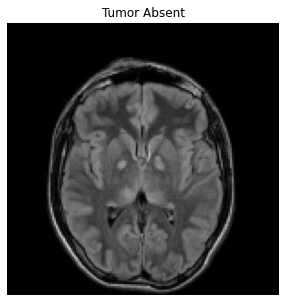

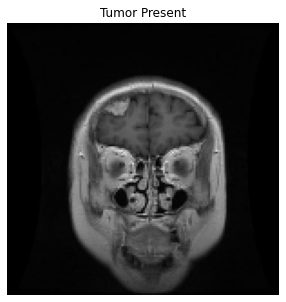

In [33]:
# plot image data from first [1] train image data (tumor-free brain)
plt.figure(figsize=(5,5))
plt.imshow(unique_train_img[0][0], cmap='gray')
plt.title(labels[unique_train_img[0][1]])
plt.axis('off')

# plot image data from last [-1] train image data (tumor patient brain)
plt.figure(figsize=(5,5))
plt.imshow(unique_train_img[-1][0], cmap='gray')
plt.title(labels[train_img_data[-1][1]])
plt.axis('off')

In [34]:
# separate image data and identifiers
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for data, label, _ in unique_train_img:
    x_train.append(data)
    y_train.append(label)
    
for data, label, _ in unique_val_img:
    x_val.append(data)
    y_val.append(label)
    
for data, label, _ in unique_test_img:
    x_test.append(data)
    y_test.append(label)

In [35]:
# scale data and convert to np.array for efficiency

x_train = np.array(x_train)/255

x_test = np.array(x_test)/255

x_val = np.array(x_val)/255

In [36]:
img_size = 150
# resize data for deep learning
x_train = x_train.reshape(-1, img_size, img_size, 3)

x_test = x_test.reshape(-1, img_size, img_size, 3)

x_val = x_val.reshape(-1, img_size, img_size, 3)

# DATAGEN

Alter data to make model more robust

In [37]:
from keras.preprocessing.image import ImageDataGenerator

In [38]:
datagen = ImageDataGenerator(\
                            featurewise_center=False,
                            samplewise_center=False,
                            featurewise_std_normalization=False,
                            samplewise_std_normalization=False, 
                            zca_whitening=False, 
                            rotation_range=30,
                            zoom_range=0.25,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            horizontal_flip=True,
                            vertical_flip=False)

# FSM

In [39]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization

In [40]:
fsm = Sequential()
fsm.add(Conv2D(32, (3,3), strides=1, padding='same', activation='relu', input_shape=(150,150,3)))
fsm.add(Flatten())
fsm.add(Dense(units=1, activation='sigmoid'))
fsm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['Precision', 'accuracy'])
fsm.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
flatten (Flatten)            (None, 720000)            0         
_________________________________________________________________
dense (Dense)                (None, 1)                 720001    
Total params: 720,897
Trainable params: 720,897
Non-trainable params: 0
_________________________________________________________________


In [41]:
from keras.callbacks import ReduceLROnPlateau

In [42]:
learning_rate_reduction_loss = ReduceLROnPlateau(monitor='val_loss', patience=2, verbose=1, factor=0.3, min_lr=10**-9)
learning_rate_reduction_acc = ReduceLROnPlateau(monitor='val_accuracy', patience=2, verbose=1, factor=0.3, min_lr=10**-9)

# Run Model

In [43]:
epochs = 12
fsm_history = fsm.fit(datagen.flow(x_train, y_train), epochs=epochs, validation_data=datagen.flow(x_val, y_val), callbacks=[learning_rate_reduction_loss, learning_rate_reduction_acc])

Epoch 1/12
80/80 [==============================] - 19s 234ms/step - loss: 1.0669 - precision: 0.8598 - accuracy: 0.8295 - val_loss: 0.5242 - val_precision: 0.8343 - val_accuracy: 0.8343
Epoch 2/12
80/80 [==============================] - 18s 228ms/step - loss: 0.4121 - precision: 0.8673 - accuracy: 0.8638 - val_loss: 0.4304 - val_precision: 0.8471 - val_accuracy: 0.8400
Epoch 3/12
80/80 [==============================] - 18s 226ms/step - loss: 0.3428 - precision: 0.8776 - accuracy: 0.8622 - val_loss: 0.3847 - val_precision: 0.8580 - val_accuracy: 0.8286
Epoch 4/12
80/80 [==============================] - ETA: 0s - loss: 0.3340 - precision: 0.8864 - accuracy: 0.8721
Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
80/80 [==============================] - 18s 228ms/step - loss: 0.3340 - precision: 0.8864 - accuracy: 0.8721 - val_loss: 0.3859 - val_precision: 0.8816 - val_accuracy: 0.8286
Epoch 5/12
80/80 [==============================] - 18s 229ms/step - 

In [44]:
y_test = np.array(y_test, dtype=np.uint8)

In [45]:
fsm.evaluate(x_test, y_test)

17/17 [==============================] - 1s 47ms/step - loss: 0.3687 - precision: 0.8812 - accuracy: 0.8521


[0.36869844794273376, 0.8812094926834106, 0.8521400690078735]

In [46]:
# model.predict_classes(x_test)
(fsm.predict(x_test) > 0.5).astype('int32')[:10]

array([[1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1]])

In [47]:
len(y_test)

514

In [48]:
len(y_val)

175

# 2ndSM

In [68]:
ssm = Sequential()
ssm.add(Conv2D(32, (3,3), strides=1, padding='same', activation='relu', input_shape=(150,150,3)))
ssm.add(MaxPool2D((3,3), strides=2, padding='same'))
ssm.add(Dropout(0.2))

ssm.add(Flatten())

ssm.add(Dense(units=1, activation='relu'))
ssm.add(Dense(units=1, activation='sigmoid'))
ssm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['Precision', 'accuracy'])
ssm.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 75, 75, 32)        0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 180000)            0         
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 180001    
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 2         
Total params: 180,899
Trainable params: 180,899
Non-trainable params: 0
_______________________________________________

In [69]:
epochs = 12
ssm_history = ssm.fit(datagen.flow(x_train, y_train), epochs=epochs, validation_data=datagen.flow(x_val, y_val))#, callbacks=[learning_rate_reduction_loss, learning_rate_reduction_acc])

Epoch 1/12
80/80 [==============================] - 26s 319ms/step - loss: 0.6960 - precision: 0.8624 - accuracy: 0.8579 - val_loss: 0.6692 - val_precision: 0.8343 - val_accuracy: 0.8343
Epoch 2/12
80/80 [==============================] - 25s 307ms/step - loss: 0.6541 - precision: 0.8614 - accuracy: 0.8614 - val_loss: 0.6457 - val_precision: 0.8343 - val_accuracy: 0.8343
Epoch 3/12
80/80 [==============================] - 26s 319ms/step - loss: 0.6299 - precision: 0.8614 - accuracy: 0.8614 - val_loss: 0.6245 - val_precision: 0.8343 - val_accuracy: 0.8343
Epoch 4/12
80/80 [==============================] - 25s 317ms/step - loss: 0.6077 - precision: 0.8614 - accuracy: 0.8614 - val_loss: 0.6052 - val_precision: 0.8343 - val_accuracy: 0.8343
Epoch 5/12
80/80 [==============================] - 26s 329ms/step - loss: 0.5872 - precision: 0.8614 - accuracy: 0.8614 - val_loss: 0.5874 - val_precision: 0.8343 - val_accuracy: 0.8343
Epoch 6/12
80/80 [==============================] - 28s 348ms/ste

# 3rd Model

In [51]:
model3= Sequential()
model3.add(Conv2D(32, (3,3), strides =1, padding = 'same', activation ='relu', input_shape = (150,150,3)))

model3.add(MaxPool2D((2,2), strides=2, padding='same'))
model3.add(Conv2D(64, (3,3), strides =1, padding ='same', activation='relu'))
model3.add(Dropout(0.2))
model3.add(MaxPool2D((2,2), strides=2, padding='same'))
model3.add(MaxPool2D((2,2), strides=2, padding='same'))
model3.add(Conv2D(64, (3,3), strides =1, padding ='same', activation='relu'))
model3.add(Dropout(0.2))

model3.add(Flatten())

model3.add(Dense(units=128, activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(units=1, activation='sigmoid'))
model3.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['Precision', 'accuracy'])
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 38, 38, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 19, 19, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 19, 19, 64)       

In [52]:
epochs = 12
model3_history = model3.fit(datagen.flow(x_train, y_train), epochs=epochs, validation_data=datagen.flow(x_val, y_val), callbacks=[learning_rate_reduction_loss, learning_rate_reduction_acc])

Epoch 1/12
80/80 [==============================] - 50s 622ms/step - loss: 0.4641 - precision: 0.8618 - accuracy: 0.8583 - val_loss: 0.4345 - val_precision: 0.8343 - val_accuracy: 0.8343
Epoch 2/12
80/80 [==============================] - 49s 610ms/step - loss: 0.3487 - precision: 0.8670 - accuracy: 0.8638 - val_loss: 0.3855 - val_precision: 0.8343 - val_accuracy: 0.8343
Epoch 3/12
80/80 [==============================] - 47s 586ms/step - loss: 0.3315 - precision: 0.8727 - accuracy: 0.8642 - val_loss: 0.3736 - val_precision: 0.8580 - val_accuracy: 0.8571
Epoch 4/12
80/80 [==============================] - 46s 581ms/step - loss: 0.3029 - precision: 0.8829 - accuracy: 0.8642 - val_loss: 0.3903 - val_precision: 0.8782 - val_accuracy: 0.8400
Epoch 5/12
80/80 [==============================] - 47s 586ms/step - loss: 0.2894 - precision: 0.8935 - accuracy: 0.8705 - val_loss: 0.3548 - val_precision: 0.8917 - val_accuracy: 0.8686
Epoch 6/12
80/80 [==============================] - 46s 580ms/ste

## visualize performance

In [53]:
from sklearn.metrics import classification_report, confusion_matrix

In [54]:
import seaborn as sns

In [55]:
def plot_metrics(model_history, epochs=12, filename='default'):
    '''
    This function takes model history and plots performance over time
    '''
    # get history from model
    history = model_history # save from .fit() on model
    epochs = [i for i in range(epochs)]
    
    # plt.rcParams.update(plt.rcParamsDefault)
    plt.style.use('fivethirtyeight')
    plt.rcParams['text.color'] = 'k'
    plt.rcParams['axes.facecolor'] = 'F0F0F0'

    fig , ax = plt.subplots(1,2)
    train_acc = history.history['accuracy']
    train_loss = history.history['loss']
    val_acc = history.history['val_accuracy']
    val_loss = history.history['val_loss']
    fig.set_size_inches(20,10)

    ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
    ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
    ax[0].set_title('Training & Validation Accuracy')
    ax[0].legend()
    ax[0].set_xlabel("Epochs")
    ax[0].set_ylabel("Accuracy")
    ax[0].spines['bottom'].set_color('black')
    ax[0].spines['left'].set_color('black')
    ax[0].tick_params(axis='x', colors='black')
    ax[0].tick_params(axis='y', colors='black')
    ax[0].yaxis.label.set_color('black')
    ax[0].xaxis.label.set_color('black')

    ax[1].plot(epochs , train_loss , 'g-o' , label = 'Testing Loss')
    ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
    ax[1].set_title('Testing Accuracy & Loss')
    ax[1].legend()
    ax[1].set_xlabel("Epochs")
    ax[1].set_ylabel("Testing & Validation Loss")
    ax[1].spines['bottom'].set_color('black')
    ax[1].spines['left'].set_color('black')
    ax[1].tick_params(axis='x', colors='black')
    ax[1].tick_params(axis='y', colors='black')
    ax[1].yaxis.label.set_color('black')
    ax[1].xaxis.label.set_color('black')
    # ax[1].set_facecolor()
    plt.savefig(f'{filename}_plot_metrics', transparent=True, dpi=150)
    plt.show()

In [56]:
# define funciton to plot confusion matrix
def plot_confusion_matrix(model, X, Y, labels=['No Tumor', 'Tumor'],\
                          target_names=['No Tumor (Class 0)','Tumor Present (Class 1)'], filename='FSM'):
    '''
    This funciton takes the model (model), test data (X_test), and test classifications (Y_test) 
        and creates predictions from the existing model used to plot the confusion matrix.
        
    Parameters: 
        model (keras model): trained model used to make predictions of data
        X (np.array): image data used to make model predictions
        Y (np.array of ints): image classifications/ target used to determine accuracy of predictions
        *kwargs
    '''
    
    # get predictions
    predictions = (model.predict(X) > 0.5).astype('int32')
    print(classification_report(Y, predictions, target_names=target_names))
    
    #create confusion matrix
    cm = confusion_matrix(Y, predictions)
    print(cm)
    
    cm = pd.DataFrame(cm, index=['0', '1'], columns=['0', '1'])
    
    # plot confusion matrix
    plt.figure(figsize=(10,10))
    sns.heatmap(cm, cmap='Greys', linecolor='grey', linewidth=1, annot=True, fmt='', xticklabels=labels, yticklabels=labels)
    
    plt.xlabel('Image Class')
    plt.ylabel('Predicted Class')
    plt.savefig(f'../report/figures/{filename}_confusion_matrix', dpi=150, transparent = True)

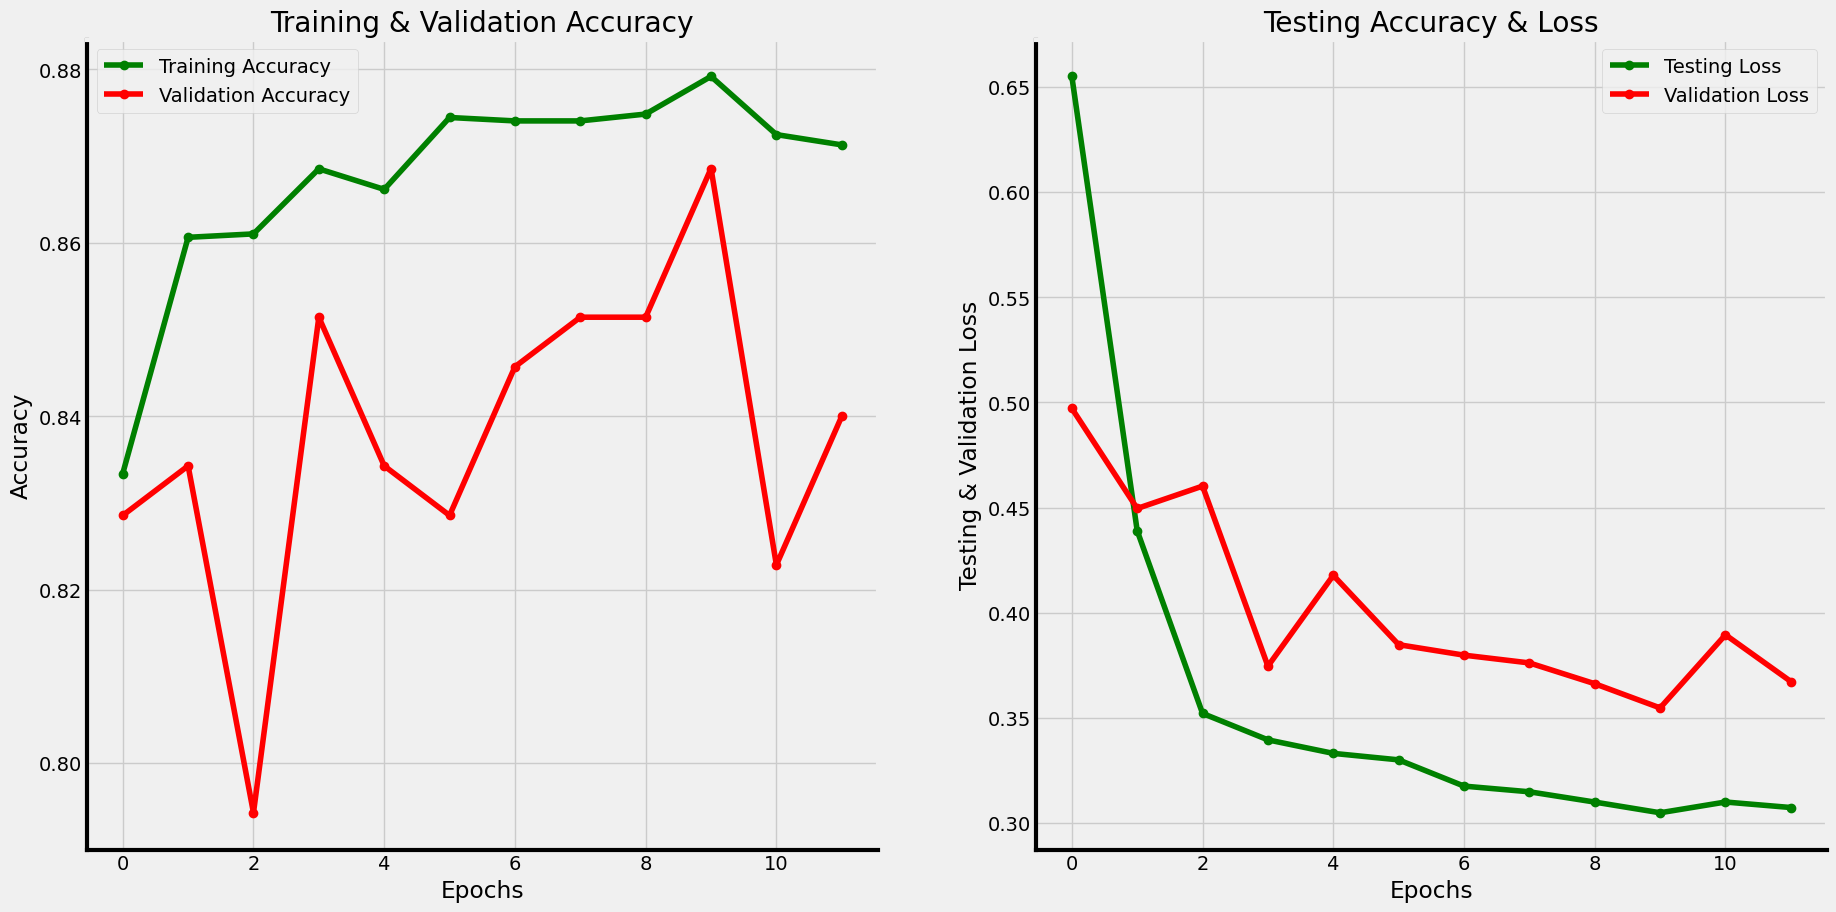

In [94]:
plot_metrics(fsm_history)

                         precision    recall  f1-score   support

     No Tumor (Class 0)       0.54      0.35      0.43        85
Tumor Present (Class 1)       0.88      0.94      0.91       429

               accuracy                           0.84       514
              macro avg       0.71      0.65      0.67       514
           weighted avg       0.82      0.84      0.83       514

[[ 30  55]
 [ 26 403]]


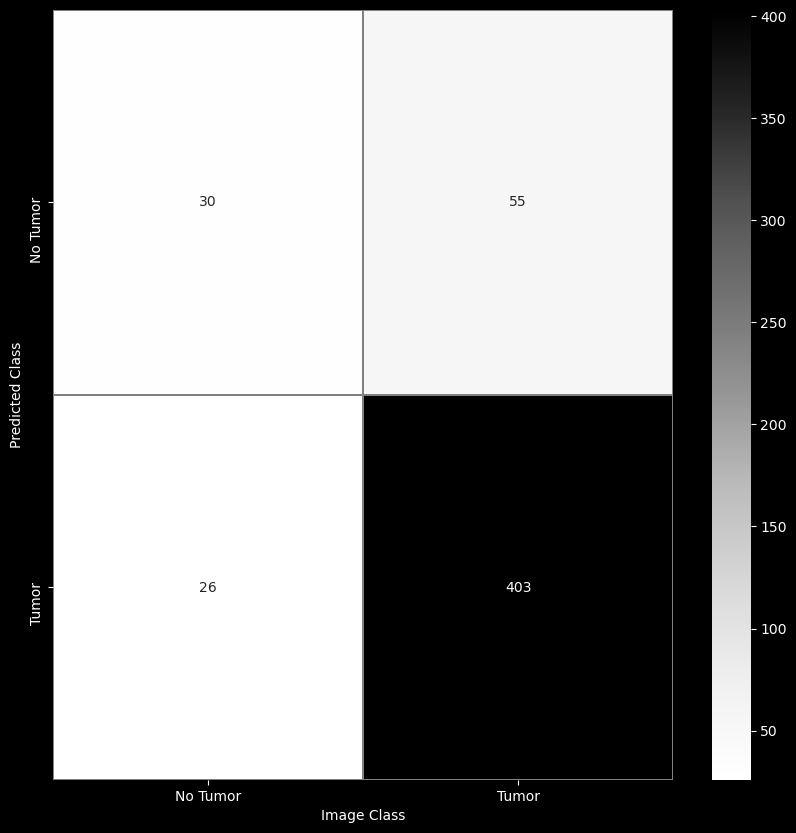

In [91]:
plot_confusion_matrix(fsm, x_test, y_test)

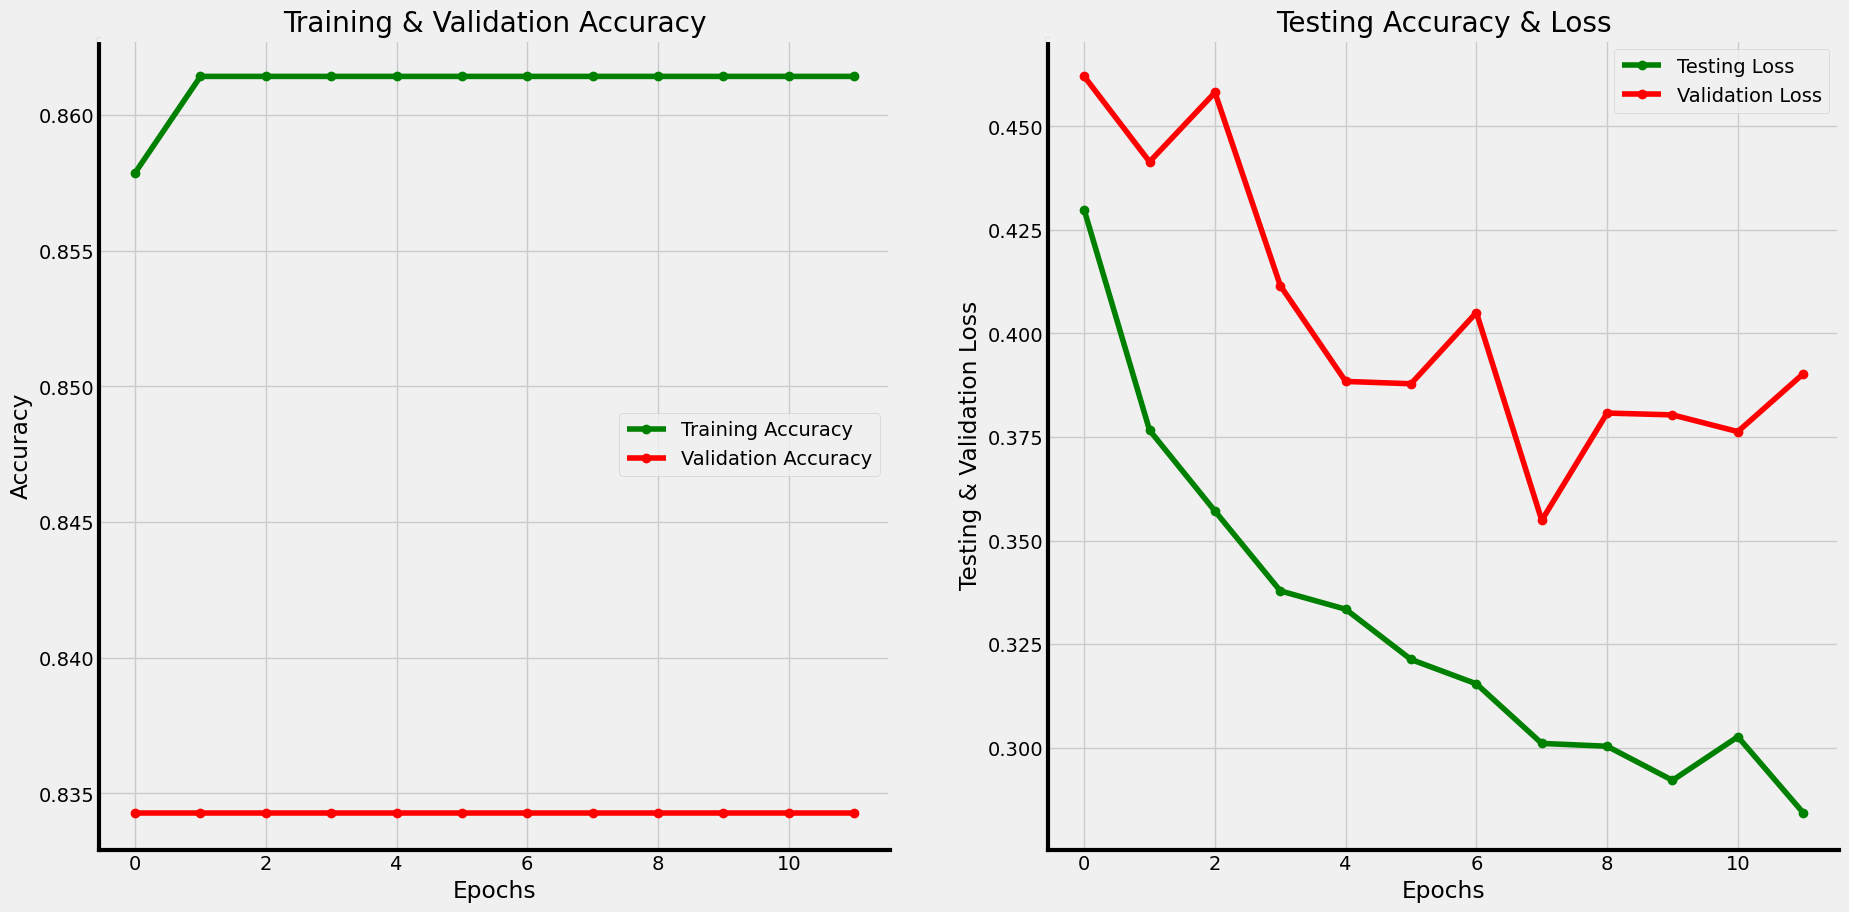

In [95]:
plot_metrics(ssm_history)

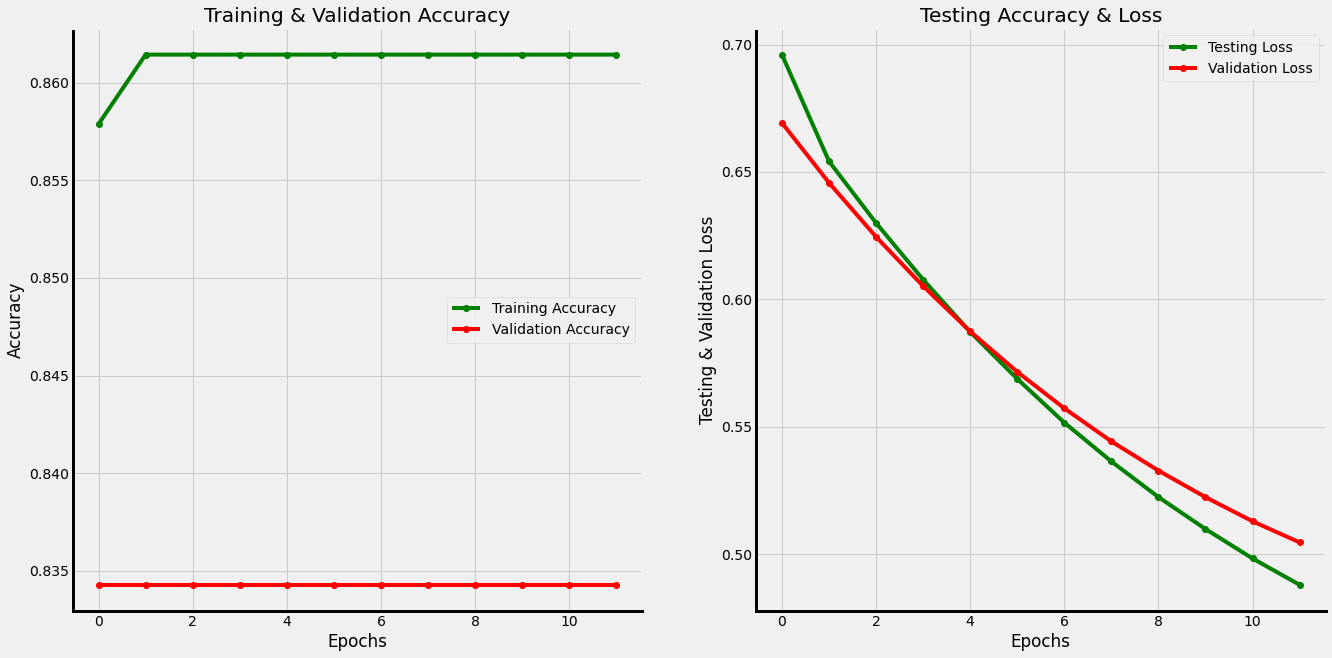

In [70]:
plot_metrics(ssm_history)

C:\Users\samjd\anaconda3\envs\oy-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                         precision    recall  f1-score   support

     No Tumor (Class 0)       0.00      0.00      0.00        85
Tumor Present (Class 1)       0.83      1.00      0.91       429

               accuracy                           0.83       514
              macro avg       0.42      0.50      0.45       514
           weighted avg       0.70      0.83      0.76       514

[[  0  85]
 [  0 429]]


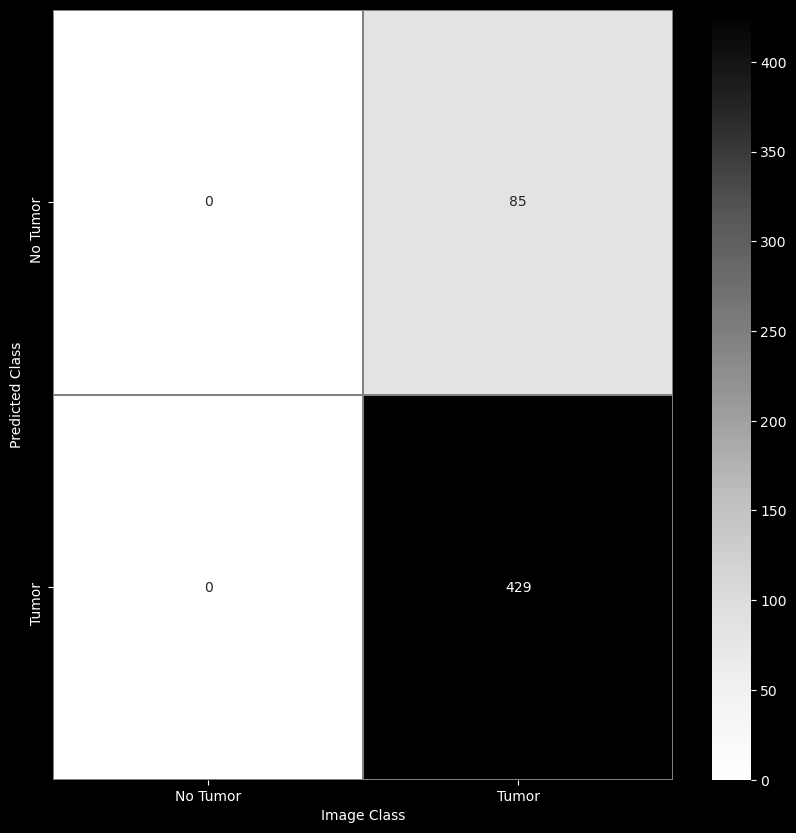

In [80]:
plot_confusion_matrix(ssm, x_test, y_test, filename='2nd_Model')

C:\Users\samjd\anaconda3\envs\oy-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                         precision    recall  f1-score   support

     No Tumor (Class 0)       0.00      0.00      0.00        85
Tumor Present (Class 1)       0.83      1.00      0.91       429

               accuracy                           0.83       514
              macro avg       0.42      0.50      0.45       514
           weighted avg       0.70      0.83      0.76       514

[[  0  85]
 [  0 429]]


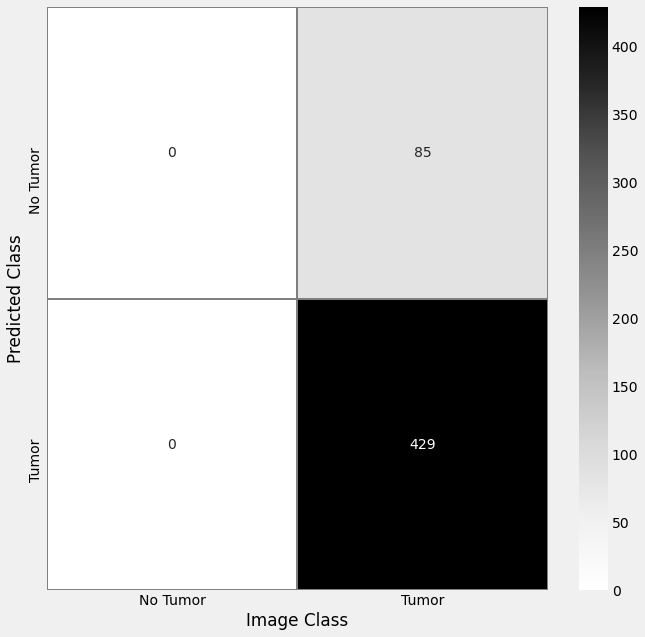

In [71]:
plot_confusion_matrix(ssm, x_test, y_test, filename='2nd_Model')

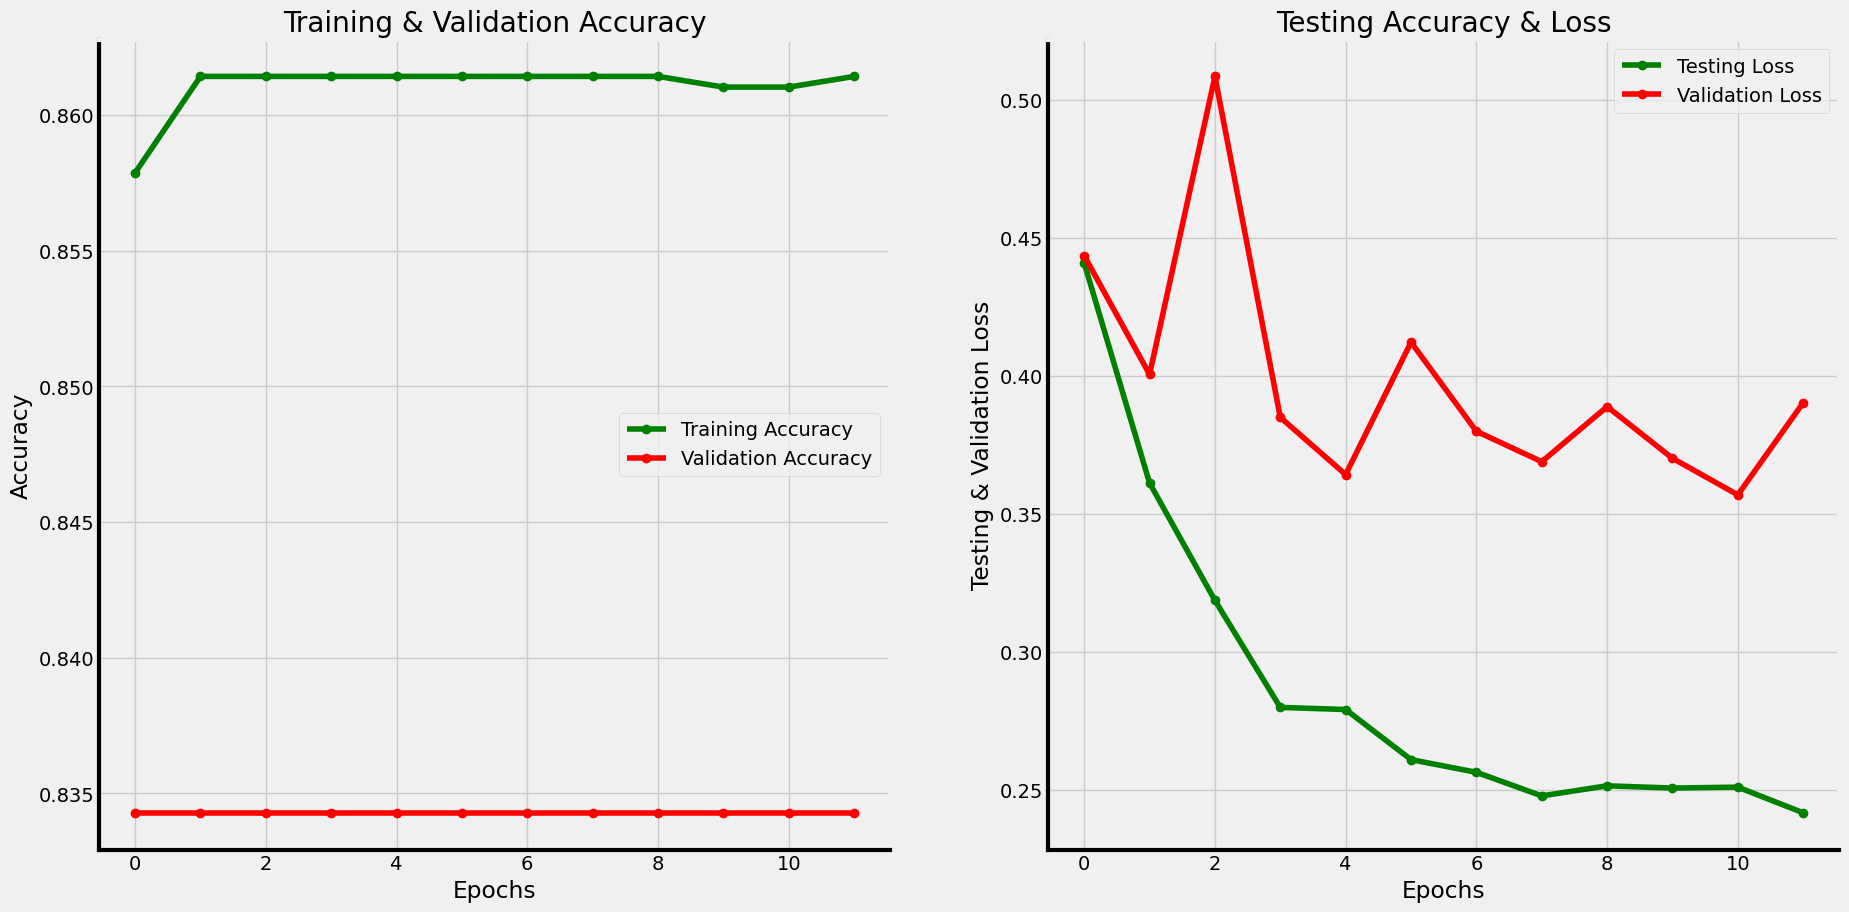

In [99]:
plot_metrics(model3_history)

C:\Users\samjd\anaconda3\envs\oy-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                         precision    recall  f1-score   support

     No Tumor (Class 0)       0.00      0.00      0.00        85
Tumor Present (Class 1)       0.83      1.00      0.91       429

               accuracy                           0.83       514
              macro avg       0.42      0.50      0.45       514
           weighted avg       0.70      0.83      0.76       514

[[  0  85]
 [  0 429]]


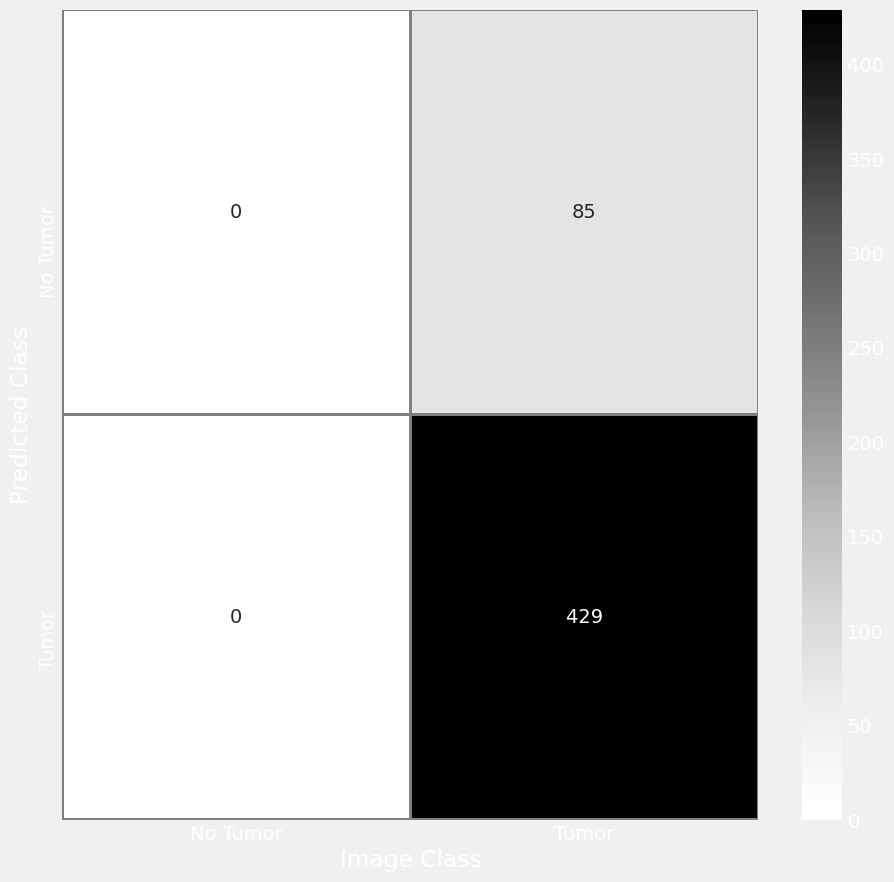

In [100]:
plot_confusion_matrix(model3, x_test, y_test)

# It's TIME for LIME

## implement LIME (and other techniques) to interpret model performance

In [72]:
[i for i in np.linspace(0, 10, num=(11))]

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]

In [56]:
[i for i in range(10)]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [57]:
def fun_sqrt(number):
    n = np.floor(np.sqrt(number))
    n = n*(n+1)
    
    return n

def fun_quad(number):
    n = np.round(np.sqrt(number))
    n = (n-1)*(n+1)
    
    return n

In [58]:
x_max = 1000
x = []
sqrt_list = []
quad_list = []


for i in range(x_max):
    x.append(i)
    sqrt_list.append(fun_sqrt(i))
    quad_list.append(fun_quad(i))


In [59]:
plt.rcParams.update(plt.rcParamsDefault)

BLUE FUNCTION: $ceil(\sqrt{n})*floor(\sqrt{n})$ <br>
RED FUNCTION: $(round(\sqrt{n})+1)*(round(\sqrt{n})-1$

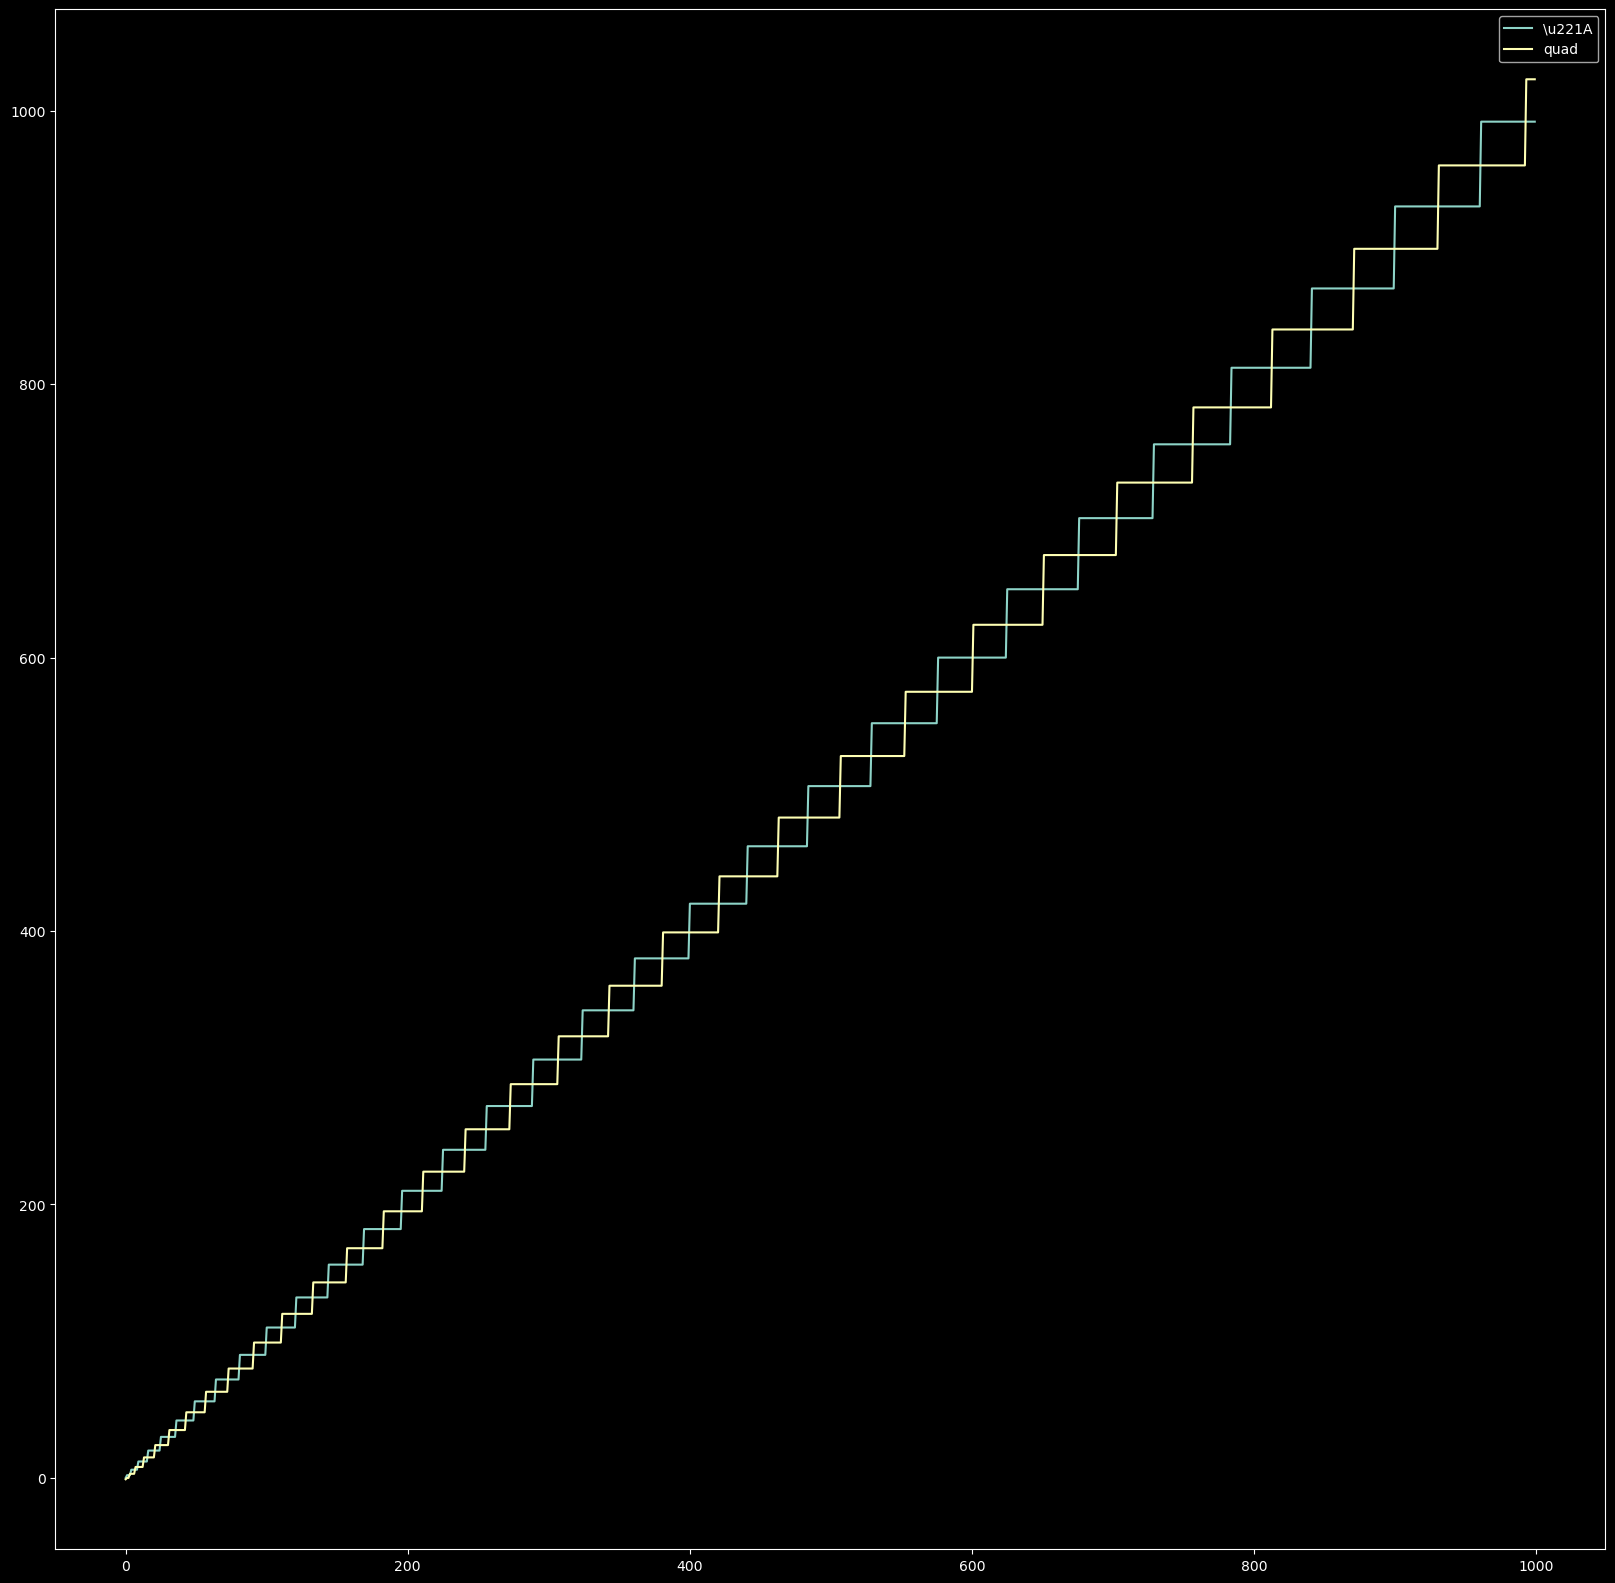

In [60]:
# plt.style.use('fivethirtyeight')
plt.style.use('dark_background')

figsize = (20, 20)
fig, ax = plt.subplots(figsize=figsize)

ax.plot(x, sqrt_list)
ax.plot(x, quad_list)
ax.legend([r'\u221A', 'quad']);
plt.savefig('fun_with_matplotlib', transparent=True, dpi=150)

In [80]:
import math 
import lime.lime_image as li

rows: 2  columns: 2
len(ax) = 2
m_end: 1  n_end: 1



i: 0



i: 1



i: 2


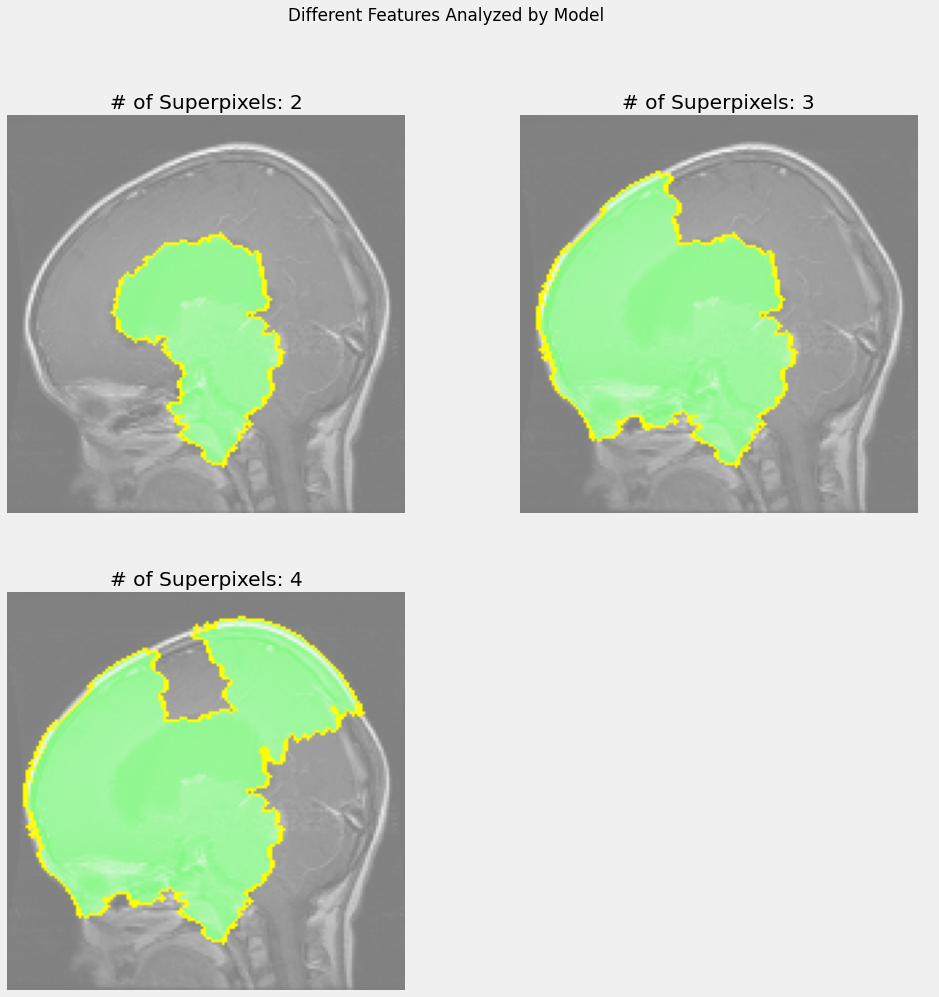

In [184]:
def lime_image(model, image, figsize=(15,15), min_superpixels=1, max_superpixels=10, positive_only=False, negative_only=False, 
               hide_rest=False, axis_off='off', subplot_titles=None, main_title='Different Features Analyzed by Model', save_fig=True, title='LIME'):
    '''
    This function uses LimeImageExplainer from lime.lime_image to create a visual of the inner workings
        of the image processing neural network.
    It does this by separating the image into various regions known as "superpixels" and judging performance
        with and without these superpixels on the image.
    
    Inputs: model (keras sequantial model)
            image (array, tensor) iamge to be analyzed
            *kwargs
    
    Returns: subplots of image with masks of superpixels 
    '''
    
    # instantiate image explainer
    explainer = li.LimeImageExplainer()
    
    # difference
    diff = max_superpixels - min_superpixels
    
    # calculate shape of figure
    columns = int(np.ceil((diff)**0.5))
    rows = int(np.ceil(diff/columns))
    
    # get grid params
    grid_max = rows*columns
    grid_diff = grid_max - diff
    
    print(f'rows: {rows}  columns: {columns}')
    
    # instantiate plot to populate with explained images
    fig, ax = plt.subplots(rows, columns, figsize=figsize)
    print(f'len(ax) = {len(ax)}')
    ax = ax.flatten()
    m_end = diff // rows
    n_end = diff % (columns)
    print(f'm_end: {m_end}  n_end: {n_end}')
    
    for i in range(diff):
        k = i + min_superpixels

        explanation = explainer.explain_instance(image, model.predict, top_labels=5, hide_color=0, num_samples=1000)
        temp, mask = explanation.get_image_and_mask(0, num_features=k, positive_only=positive_only, negative_only=negative_only, hide_rest=hide_rest)

        # plot results
        print(f'i: {i}')
        ax[i].imshow(mark_boundaries(temp/2 + 0.5, mask))
        ax[i].axis(axis_off)
        
        if not subplot_titles:
            ax[i].set_title(f'# of Superpixels: {k}')            

        else:
            ax[i].set_title(subplot_titles)
    
    if grid_diff:
        for j in range(diff, grid_max):
            ax[j].axis(axis_off)
            
    
    fig.suptitle(main_title)
    
    if save_fig:
        plt.savefig(f'../../{title}', transparent=True)

        
lime_image(fsm, x_train[1006], min_superpixels=2, max_superpixels=5, title='fsm' )

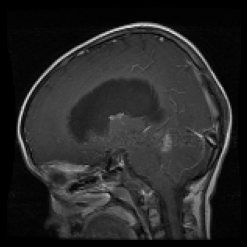

In [191]:
plt.style.use('dark_background')
plt.imshow(x_train[1006])
plt.grid(None)
plt.axis('off')

plt.savefig('1006', transparent=True, dpi=150)

rows: 1  columns: 2
len(ax) = 2
m_end: 2  n_end: 0



i: 0



i: 1


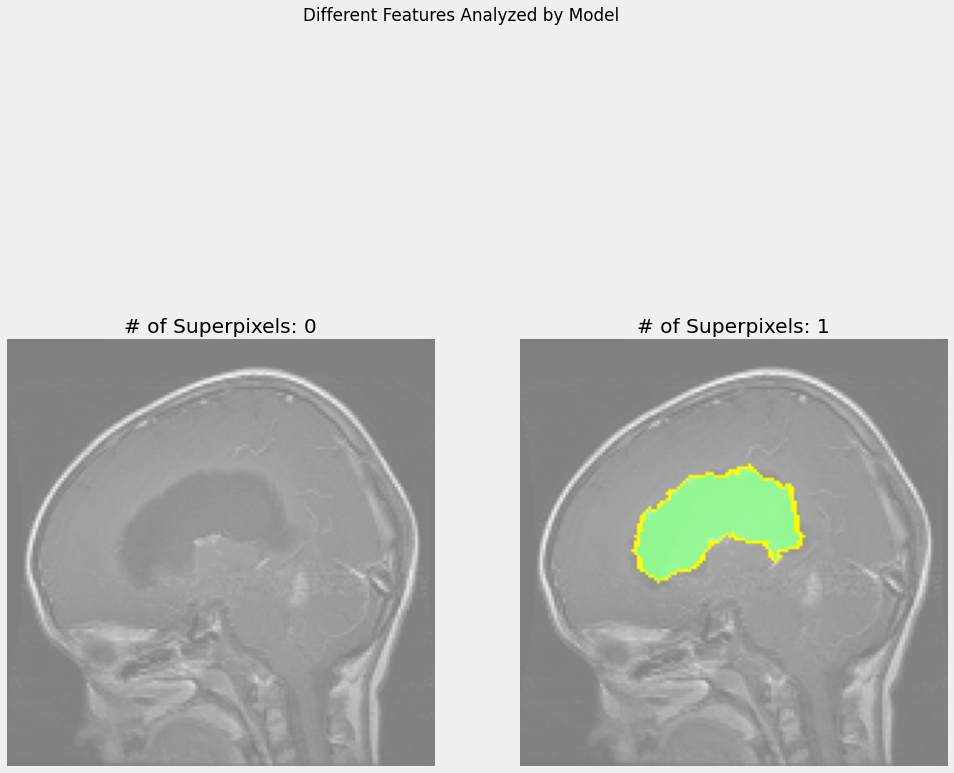

In [185]:
lime_image(fsm, x_train[1006], min_superpixels=0, max_superpixels=2, title='lime2' )

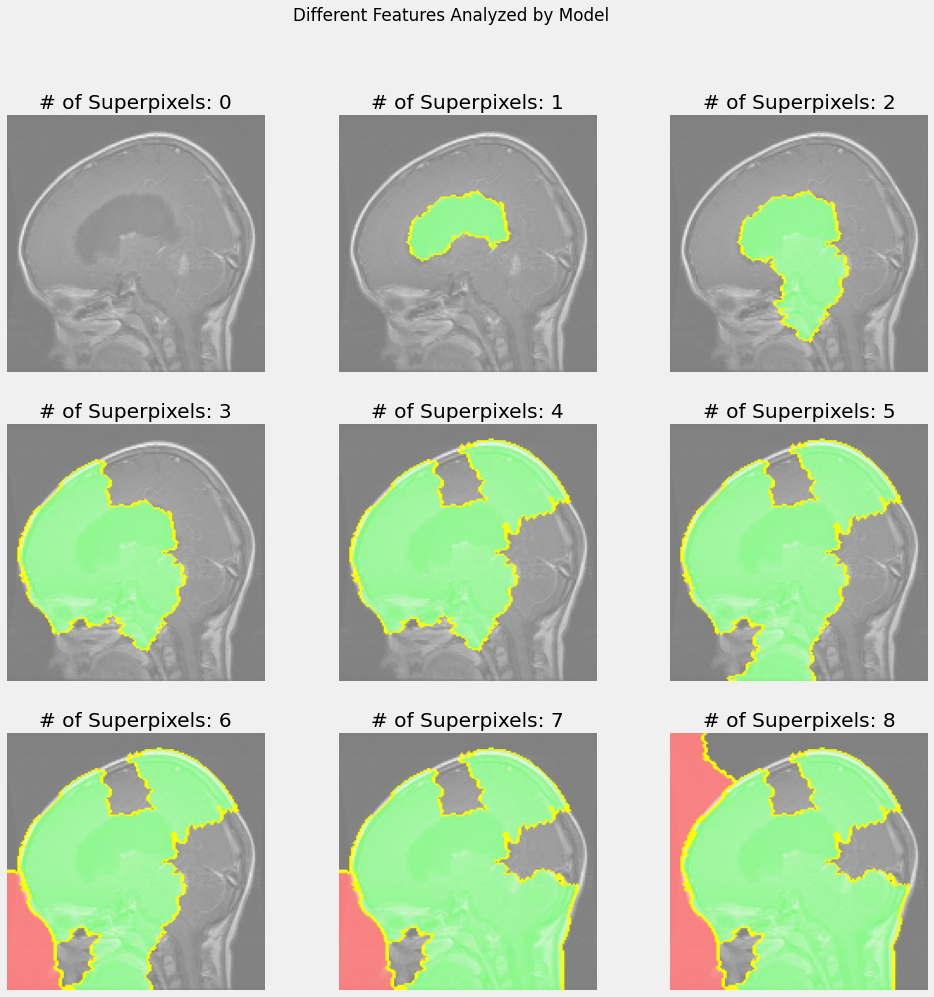

In [107]:
lime_image(fsm, x_train[1006], min_superpixels=0, max_superpixels=9, title='lime3')

rows: 2  columns: 2
len(ax) = 2
m_end: 1  n_end: 1



i: 0



i: 1



i: 2


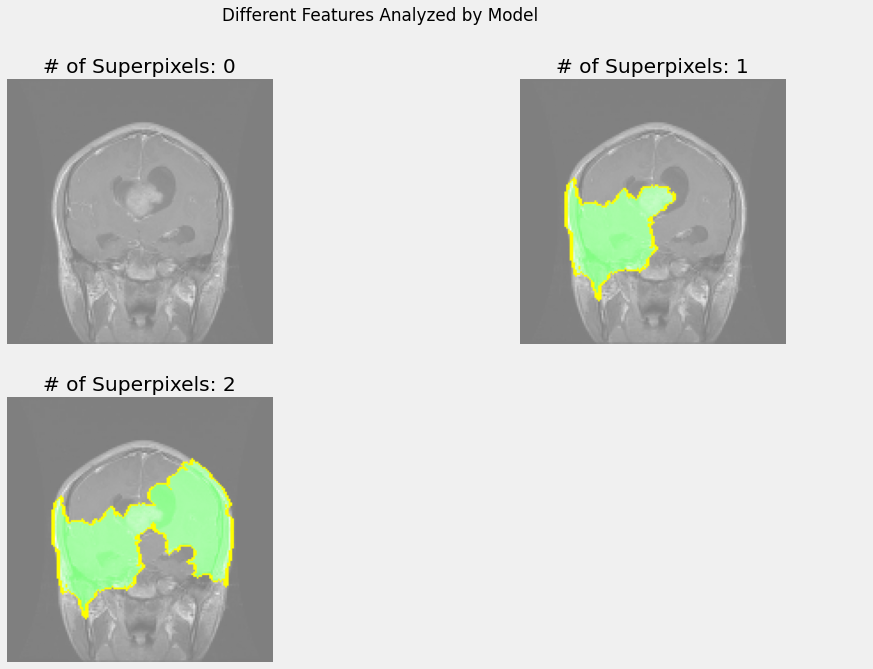

In [187]:
lime_image(fsm, x_train[1007], min_superpixels=0, max_superpixels=3, figsize=(15,10))

# Get paths to additional image files 
## (updated)

In [192]:
# imports from kaggle example https://www.kaggle.com/kmader/show-3d-nifti-images
# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# import os
import skimage
from skimage.morphology import ball, disk, dilation, binary_erosion, remove_small_objects, erosion, closing, reconstruction, binary_closing, binary_dilation, binary_opening
from skimage.measure import label,regionprops, perimeter
from skimage.filters import roberts, sobel
from skimage import measure, feature
from skimage.segmentation import clear_border
from skimage import data
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import scipy.misc
from glob import glob
from skimage.io import imread

# Create .gif from fdata

## Define Functions

### Define function to create list of folder names within a given directory

In [ ]:
def get_dir_folders(directory):
    '''
    Input: list-like directory containing the folder names / file names within a given parent folder
    Returns: list clean_directory containing only folder names within the parent folder
    '''
    # create list copy of directory
    clean_directory = list(directory)
    
    # iterate through directory
    for name in directory:
        
        # remove all names with file extensions
        print('path: ', name)
        
        filename = name.split('/')[-1]
        
        if '.' in filename:
            print(f'remove {name} from list')
            directory.remove(name)
            
    return clean_directory
            
#         # remove all names with file extensions
#         print('path: ', name)
#         print('name[-4]', name[-4])
#         if '.' == name[-4]:
#             print(f'remove {name} from list')
#             clean_directory.remove(name)
            
#         elif '.' in name[-6:]:
#             print(f'remove {name} from list')
#             clean_directory.remove(name)
            
#         elif 'txt' in name:
#             print(f'remove {name} from list')
#             clean_directory.remove(name)
            
#         elif 'tar' in name:
#             print(f'remove {name} from list')
#             clean_directory.remove(name)
            


### Define function to load image file(s) given folder path

In [ ]:
# def get_gz_img_paths(parent_folder, in_name='*'):

#     return glob(os.path.join([folder for folder in image_folder if in_name in folder][0], '*'))


### Define function to create .gif given image data

In [ ]:
# define function to create gif from image data
def create_gif(input_image, title='Scan .gif', filename='scan.gif'):
    # create .gif-like https://matplotlib.org/gallery/animation/dynamic_image2.html
    import imageio
    import matplotlib.animation as animate

    images = []
    input_image_data = input_image.get_fdata()

    fig = plt.figure()

    for i in range(len(input_image_data)):
        im = plt.imshow(input_image_data[i], animated=True)
        images.append([im])
    
    ani = animate.ArtistAnimation(fig, images, interval=25, blit=True, repeat_delay=500)
    plt.title(title, fontsize=20)
    ani.save(filename)
    plt.show()

## Load Brain Development Data Paths (Healthy Brains)

In [ ]:
# get paths to data
# base path for data sourced from brain-development.org
bd_base_path = os.path.join('D:\MRI_data\BrainDevelopmentOrg')


In [ ]:
bd_directory = glob(os.path.join(bd_base_path, '*'))

In [ ]:
# get list of all folders in directory
# get copy of full directory
bd_image_folders = get_dir_folders(bd_directory)
bd_image_folders

In [ ]:
bd_image_folders = [folder for folder in bd_image_folders if 'image' in folder]
bd_image_folders

## Get Paths to Various Scan Types

### Get T1 Path

In [ ]:
bd_image_files_T1 = glob(os.path.join([folder for folder in bd_image_folders if 'T1_' in folder][0], '*'))
print(len(bd_image_files_T1))
bd_image_files_T1[:5]

### Get T2 Path

In [ ]:
bd_image_files_T2 = glob(os.path.join(str([folder for folder in bd_image_folders if 'T2_' in folder][0]), '*'))
print(len(bd_image_files_T2))
bd_image_files_T2[:5]

### Get MRA Path

In [ ]:
bd_image_files_MRA = glob(os.path.join(str([folder for folder in bd_image_folders if 'MRA_' in folder][0]), '*'))
print(len(bd_image_files_MRA))
bd_image_files_MRA[:5]

### Get PD Path

In [ ]:
bd_image_files_PD = glob(os.path.join(str([folder for folder in bd_image_folders if 'PD_' in folder][0]), '*'))
print(len(bd_image_files_PD))
bd_image_files_PD[:5]

## Load Image Data From File

In [123]:
import nibabel as nib

### Load a T1 Image

In [126]:
img_T1 = nib.load(bd_image_files_T1[17])
img_T1

In [127]:
img_T1.get_fdata().shape

(256, 256, 150)

### Load a T2 Image

In [26]:
# load specified image
img_T2 = nib.load(bd_image_files_T2[17])
img_T2

In [27]:
img_T2.shape

(256, 256, 130)

In [28]:
img_T2.get_fdata().shape

(256, 256, 130)

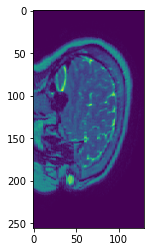

In [29]:
T2_image = img_T2.get_fdata()
# test_mask = 
fig, ax = plt.subplots()
ax.imshow(T2_image[80]//2)

### Load an MRA image

In [125]:
img_MRA = nib.load(bd_image_files_MRA[17])
img_MRA

In [31]:
img_MRA.get_fdata().shape

(512, 512, 100)

### Load a PD IMAGE

In [32]:
img_PD = nib.load(bd_image_files_PD[17])
img_PD

In [34]:
img_PD.get_fdata().shape

(256, 256, 130)

## Create Images for EDA/ understanding Data

#### Create T1 image

In [199]:
create_gif(nib.load(bd_image_files_T1[0]), title="T1 Scan .gif", filename="T1_MRI.gif")

TypeError: cannot unpack non-iterable Figure object

<Figure size 640x480 with 0 Axes>

MovieWriter ffmpeg unavailable; using Pillow instead.


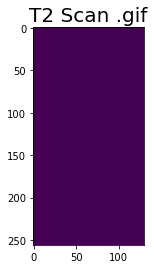

In [36]:
create_gif(img_T2, title='T2 Scan .gif', filename='T2_MRI.gif')

MovieWriter ffmpeg unavailable; using Pillow instead.


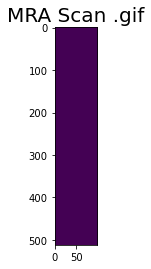

In [32]:
create_gif(img_MRA, title='MRA Scan .gif', filename='MRA_MRI.gif')

MovieWriter ffmpeg unavailable; using Pillow instead.


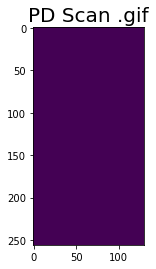

In [36]:
create_gif(img_PD, title='PD Scan .gif', filename='PD_MRI.gif')